데이터 변수 설명 :  https://www.dacon.io/competitions/official/235679/talkboard/401866?page=1&dtype=recent&ptype=pub 

# 국회의원에 관한 정보를 가지고 간단하게 표현할 수 있는 워드 클라우드와 barplot을 그려보았습니다.

In [3]:
!pip install wordcloud

  Using cached wordcloud-1.8.1-cp38-cp38-win_amd64.whl (155 kB)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import seaborn as sns
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

['NanumGothic']


# 데이터의 대략적인 정보

In [5]:
new_people = pd.read_csv("new_people.csv", encoding = "cp949")
#process = pd.read_csv("../../data/open/process.csv")
#suggest = pd.read_csv("../../data/open/suggest.csv")

In [6]:
new_people.shape

(5605, 16)

In [7]:
new_people.columns

Index(['DAESU', 'DAE', 'DAE_NM', 'NAME', 'NAME_HAN', 'JA', 'HO', 'BIRTH',
       'BON', 'POSI', 'HAK', 'HOBBY', 'BOOK', 'SANG', 'DEAD', 'URL'],
      dtype='object')

# 결측 확인

In [8]:
new_people.isnull().sum(axis = 0).sort_values(ascending = False)
# 8개의 columns에서 결측이 관측됨.

JA          5515
HO          4222
BOOK        3725
SANG        3375
HOBBY       3308
BON         2828
POSI        1288
HAK            7
URL            0
DEAD           0
BIRTH          0
NAME_HAN       0
NAME           0
DAE_NM         0
DAE            0
DAESU          0
dtype: int64

# 대수 비율

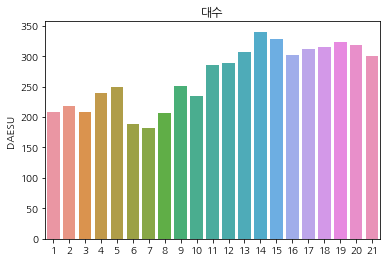

In [9]:
# 국회의원 대수별 국회의원의 총수를 시각화
sns.barplot(x = new_people.DAESU.value_counts().index,
            y = new_people.DAESU.value_counts())
plt.title('대수')
plt.show()

# 비례대표 비율

In [10]:
# DAE 컬럼에 비례대표라는 단어가 들어간 국회의원의 수
len(new_people[new_people.DAE.apply(lambda x: '비례대표' in x)])

450

In [11]:
# 전체 국회의원의 수
len(new_people)

5605

In [12]:
# 전체 국회의원 중 8%가 비례대표
print(len(new_people[new_people.DAE.apply(lambda x: '비례대표' in x)]) / len(new_people) * 100, '%')

8.028545941123996 %


# 국회의원 중복률

In [16]:
# 이름과 생년월일이 같다면 동일인물로 설정.
new_people['people'] = new_people.NAME + new_people.BIRTH
new_people.head(2)

,DAESU,DAE,DAE_NM,NAME,NAME_HAN,JA,HO,BIRTH,BON,POSI,HAK,HOBBY,BOOK,SANG,DEAD,URL,people
0,21,제19대국회의원(경남 창원시성산구) 정당_66\r\n제21대국회의원(경남 창원시성산...,21대의원,강기윤,姜起潤,NaN,NaN,1960년 06월 04일,NaN,NaN,창원상남초등학교 \r\n창원남중학교\r\n마산공업고등학교 \r\n창원대학교 행정학...,NaN,NaN,NaN,년 월 일,http://www.rokps.or.kr/profile/profile_view.as...,강기윤1960년 06월 04일
1,21,제21대국회의원(대구동구을) 정당_74,21대의원,강대식,姜大植,NaN,NaN,1959년 11월 02일,NaN,NaN,"경북대학교 사범대학 부속고등학교\r\n영남대학교 경영대학원 경영학 석사, 박사\r\...",NaN,NaN,NaN,년 월 일,http://www.rokps.or.kr/profile/profile_view.as...,강대식1959년 11월 02일


In [17]:
# 역대 국회의원을 지낸 사람의 수(중복 제외)
len(new_people['people'].unique())

3066

In [18]:
print(len(new_people['people'].unique())/len(new_people) * 100,"%")
# 57%가 국회의원에 중복 당선 되었음.

54.70115967885816 %


# 출생지 시각화

In [22]:
# 출생지역이 존재하는 데이터
new_people[new_people['BON'].isnull() != True].BON

17         안동
18         안동
24         선산
25         김해
31         경주
        ...  
5491       平山
5511       파평
5526       전주
5534       원주
5558    경남 진주
Name: BON, Length: 2777, dtype: object

In [23]:
# 한자, (), 공백 제거
def del_hanza(string):
    string = re.sub('[一-龥()]', '',string)# 한자 제거
    string = string.strip()# 공백 제거
    if len(string) >= 2:# 2개 이상의 지역이 들어간 경우
        string = string[:2] # 앞에 명시된 지역으로 채우기
    else:
        string = ''
    return string

In [24]:
del_hanza('연양 (硯陽)')

'연양'

In [25]:
new_people.loc[new_people['BON'].isnull() != True, "BON"] = new_people[new_people['BON'].isnull() != True].BON.apply(del_hanza)

In [26]:
bon_value_counts = new_people[new_people['BON'].isnull() != True].BON.value_counts()
bon_value_counts

김해    248
경주    230
전주    199
밀양    136
진주     87
     ... 
청풍      1
삭녕      1
예양      1
함창      1
삭령      1
Name: BON, Length: 187, dtype: int64

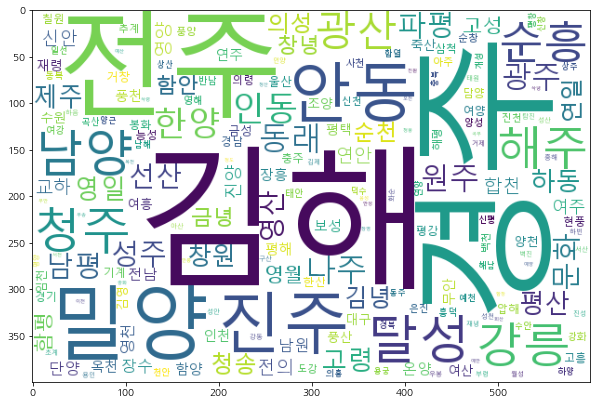

In [27]:
# 국회의원의 출생지역 Word Cloud 시각화
plt.figure(figsize = (10,10))
wordcloud1 = WordCloud( background_color='white',
                        font_path = "c:/Windows/Fonts/malgun.ttf",
                        width=600,
                        height=400).generate_from_frequencies(bon_value_counts)
plt.imshow(wordcloud1)
plt.show()

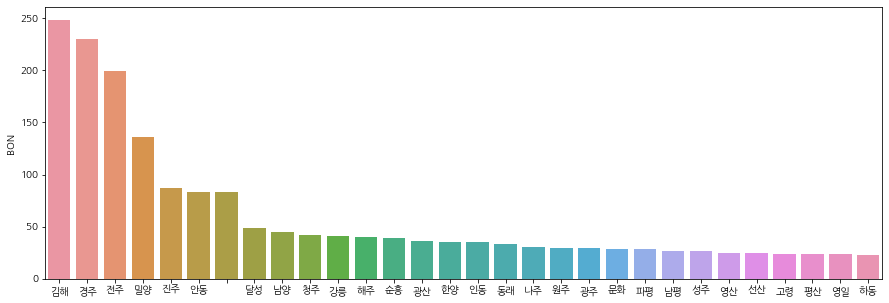

In [28]:
# barplot으로 보이기
plt.figure(figsize = (15,5))
sns.barplot(bon_value_counts.index[:30],bon_value_counts[:30])
plt.show()

# 종교 및 취미 시각화

In [29]:
# / , 공백 제거
def string_to_list(string):
    string = string.replace("/", ",")
    string = string.replace(",", " ").split()
    return string

In [30]:
hobby_list = ','.join(new_people[new_people.HOBBY.isnull()==False].HOBBY)
hobby_list = string_to_list(hobby_list)

In [31]:
new_people.loc[new_people.HOBBY.isnull()==False,
               'HOBBY'] = new_people[new_people.HOBBY.isnull()==False].HOBBY.apply(string_to_list)
hobby_counts = pd.Series(hobby_list).value_counts()

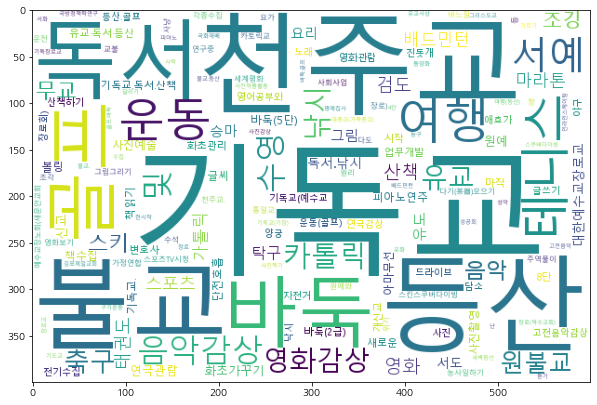

In [32]:
# 종교, 취미 Word Cloud 시각화

plt.figure(figsize = (10,10))
wordcloud1 = WordCloud( background_color='white',
                        font_path = "c:/Windows/Fonts/malgun.ttf",
                        width=600,
                        height=400).generate_from_frequencies(hobby_counts)

plt.imshow(wordcloud1)
plt.show()

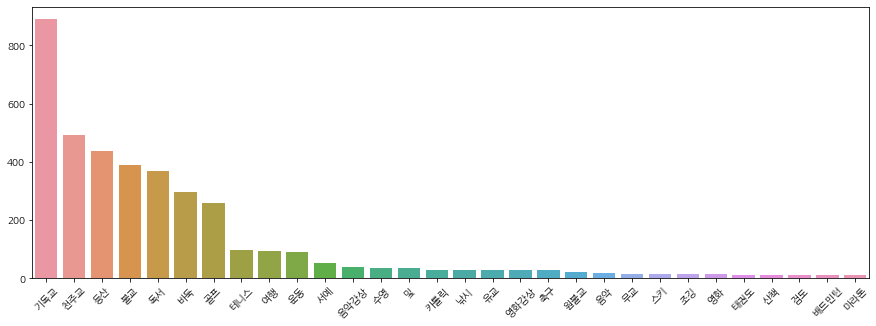

In [33]:
# barplot으로 표현
plt.figure(figsize = (15,5))
sns.barplot(hobby_counts.index[:30],hobby_counts[:30])
plt.xticks(rotation = 45)
plt.show()